# Proof of concept

Ici, on teste nos strategies pour le drone et pour deneiger Montreal sur des graphes plus petits.

In [14]:
import networkx as nx
import osmnx as ox
import random
from collections import Counter

%matplotlib inline
ox.__version__

'1.2.0'

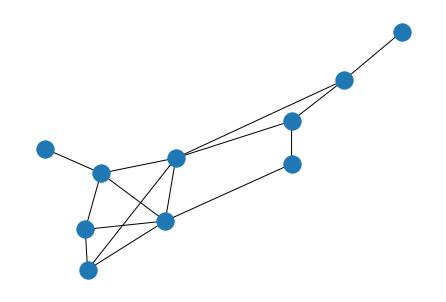

In [15]:
# Creating random graph
nodes = 10
edges = 15
G = nx.gnm_random_graph(nodes, edges)

while not nx.is_connected(G):
    G = nx.gnm_random_graph(nodes, edges)

# Adding random weights
#code creating G here
for (u,v,w) in G.edges(data=True):
    w['weight'] = random.randint(0,10)

nx.draw(G)

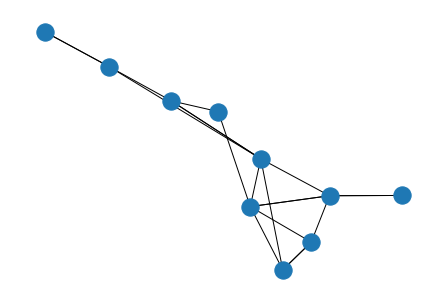

In [16]:
# Checking if eulerian, if not eulerize
if not nx.is_eulerian(G):
    G = nx.eulerize(G)

nx.draw(G)

(0, 1)
(1, 0)
(0, 7)
(7, 6)
(6, 7)
(7, 4)
(4, 3)
(3, 8)
(8, 9)
(9, 8)
(8, 5)
(5, 3)
(3, 5)
(5, 2)
(2, 5)
(5, 6)
(6, 9)
(9, 3)
(3, 6)
(6, 0)
[(0, 1), (1, 0), (0, 7), (7, 6), (6, 7), (7, 4), (4, 3), (3, 8), (8, 9), (9, 8), (8, 5), (5, 3), (3, 5), (5, 2), (2, 5), (5, 6), (6, 9), (9, 3), (3, 6), (6, 0)]
MultiDiGraph with 10 nodes and 20 edges
#ff0000
#f3000c
#e70018
#db0024
#cf0030
#c3003c
#b70048
#ab0054
#9f0060
#93006c
#870078
#7b0084
#6f0090
#63009c
#5700a8
#4b00b4
#3f00c0
#3300cc
#2700d8
#1b00e4


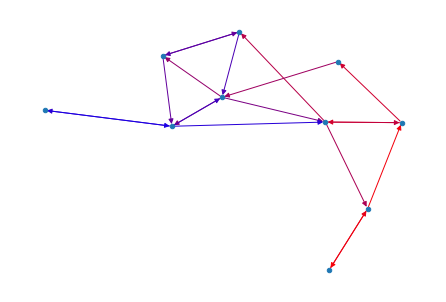

In [47]:
# Getting eulerian cycle
cycle = nx.eulerian_circuit(G)

newCycle = []
for c in cycle:
    print(c)
    newCycle.append((c[0], c[1]))

print(newCycle)
J = nx.MultiDiGraph(newCycle)
print(J)

def convert_to_hex(rgb) :
    return '#%02x%02x%02x' % (rgb[0], rgb[1], rgb[2])


colors = []
rgb = (255,0,0)
evo = 255 // len(J.edges())
for i in range(len(J.edges())):
    print(convert_to_hex(rgb))
    colors.append(convert_to_hex(rgb))
    rgb = (rgb[0] - evo, 0, rgb[2] + evo)


nx.draw(J, edge_color=colors, node_size=20)